<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
print(X.head())
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2',
         '(m/n)^3', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']
#print(names[1])


8750
   subtype  class  indeks    n   m   n/m  (n/m)^2     (n/m)^3       m/n  \
0        2      7       5  162  72  2.25   5.0625   11.390625  0.444444   
1       10      7       3   20   4  5.00  25.0000  125.000000  0.200000   
2        3      4       9  160  64  2.50   6.2500   15.625000  0.400000   
3       12      5       6   90  10  9.00  81.0000  729.000000  0.111111   
4        2      7       3  180  80  2.25   5.0625   11.390625  0.444444   

    (m/n)^2   (m/n)^3   av.length     std.dev  median  range  min   max    k  
0  0.197531  0.087791  640.228394  163.237473   646.0    871  208  1079  144  
1  0.040000  0.008000   85.449997   20.828814    90.0     69   42   111   17  
2  0.160000  0.064000   98.631248   19.575890   102.0     96   46   142   69  
3  0.012346  0.001372   94.111115   40.053181    93.0    210    1   211   70  
4  0.197531  0.087792  699.244446  179.917664   686.5   1076  205  1281  154  


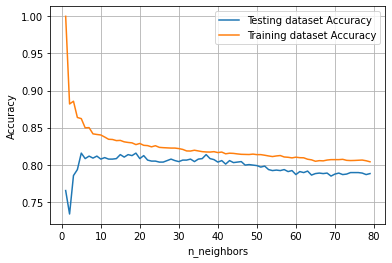

In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_modified = X.drop(['class', 'm', 'subtype'], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X_modified, y_new, random_state=0, train_size = 0.83)

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier


neighbors = np.arange(1, 80)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
  


In [5]:
knn = KNeighborsClassifier(n_neighbors=38)
  
knn.fit(X_train, y_train)
pred_ = knn.predict(X_test)
cnt = 0
cnt_correct = 0

for i in range(len(pred_)):
  cnt += 1
  if(pred_[i] == y_test[i]):
    cnt_correct += 1
  if(pred_[i] == 0 and y_test[i]== 3):
    #print(X_test[i])
    for j in range(len(names)):
      print(names[j]+"->"+str(X_test_copy.iloc[i][names[j]]))
    print("------------------------------------------------------------------")
  
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')

indeks->2.0
n->120.0
n/m->2.0
(n/m)^2->4.0
(n/m)^3->8.0
m/n->0.5
(m/n)^2->0.25
(m/n)^3->0.125
av.length->99.625
std.dev->48.803493
median->100.0
range->253.0
min->6.0
max->259.0
k->93.0
------------------------------------------------------------------
indeks->6.0
n->200.0
n/m->2.0
(n/m)^2->4.0
(n/m)^3->8.0
m/n->0.5
(m/n)^2->0.25
(m/n)^3->0.125
av.length->101.815002
std.dev->50.574791
median->99.0
range->264.0
min->7.0
max->271.0
k->125.0
------------------------------------------------------------------
indeks->10.0
n->160.0
n/m->2.0
(n/m)^2->4.0
(n/m)^3->8.0
m/n->0.5
(m/n)^2->0.25
(m/n)^3->0.125
av.length->103.606247
std.dev->48.652172
median->101.5
range->257.0
min->6.0
max->263.0
k->115.0
------------------------------------------------------------------
accuracy: 80.85%


accuracy: 80.85%


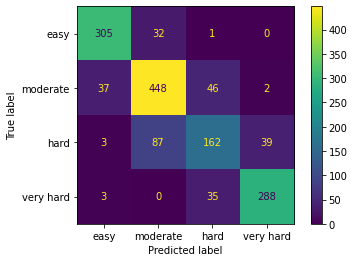

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#for i in range(len(pred_)):
#  print(true_y[i])
#print(confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3]))
cm = confusion_matrix(y_test, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
#plt.subplot(1, 2, 1)
cmd.plot()
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')